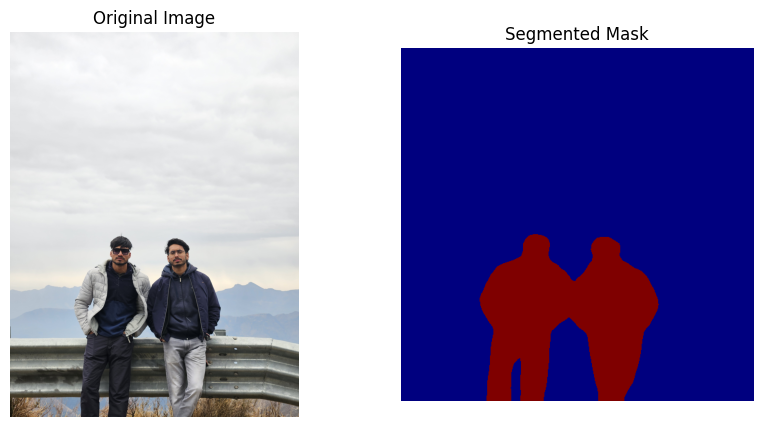

In [ ]:
import torch
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import cv2
from torchvision import models





# torch: Used for loading the DeepLabV3 model and performing tensor operations.
# torchvision.transforms: Used to preprocess images.
# numpy: Used for numerical operations.
# matplotlib.pyplot: Used for visualizing images.
# cv2 (OpenCV): Used for reading, resizing, and processing images.
# torchvision.models: Contains pre-trained deep learning models, including DeepLabV3.
# here we are Loading the pre-trained DeepLabV3 model jiska use hum sementic segmentation ke liye karte hai




model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()


# Loading the Pre-trained DeepLabV3 Model

# Function to preprocess the image jisme image ko load karna resize karna aur normalize karna aage pass karne se pahele
def preprocess_image(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path)

    # Check if image is loaded properly
    if image is None:
        raise FileNotFoundError(f"Error: The image '{image_path}' was not found or could not be loaded.")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = transform(image).unsqueeze(0)
    return image

# Function to perform segmentation
def segment_image(image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        output = model(image)['out']
    mask = torch.argmax(output.squeeze(), dim=0).numpy()
    return mask

# Load and segment an image
image_path = "/content/20250215_110948.jpg"  # Provide the actual image path
segmented_mask = segment_image(image_path)

# Display the original image and segmented mask
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_mask, cmap="jet")
plt.title("Segmented Mask")
plt.axis("off")

plt.show()